Import the libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px

Read the dataset

In [3]:

df = pd.read_csv("Admission_Predict.csv")


Information of dataset

In [4]:
#shape of the dataset
df.shape

(400, 9)

In [5]:
#colums we have in dataset
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#check data types
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [8]:
#statistical summary of the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
#check null values
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
#Check if there duplicate
df.duplicated().any()

False

In [11]:
#clean white space
df.columns = df.columns.str.strip()

In [12]:
#remove unnecessary column
df.drop('Serial No.',inplace=True,axis=1)

In [13]:
df.shape

(400, 8)

Average requirements of all features to get admission for all universities on the basis of their Ratings.

In [14]:
# Groupby the data by "University rating".
df.groupby("University Rating").mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


Minimum requirements for more than 60% chance to get admission.

In [15]:
df[(df['Chance of Admit']>0.6)].min()

GRE Score            293.00
TOEFL Score           97.00
University Rating      1.00
SOP                    1.50
LOR                    1.50
CGPA                   7.40
Research               0.00
Chance of Admit        0.61
dtype: float64

Data Visualization

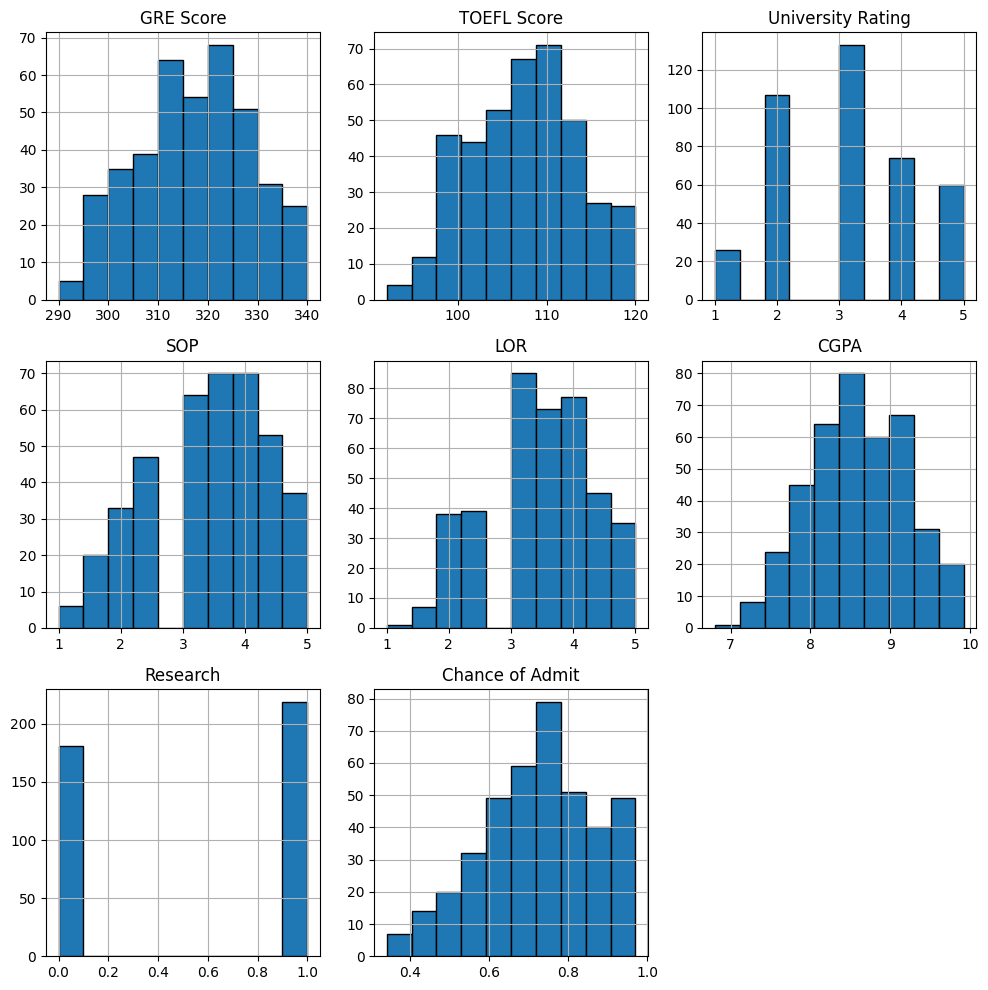

In [16]:
df.hist(figsize=(10,10),edgecolor="k")
plt.tight_layout()
plt.show()

Observation :
GRE Score : 320 ~ 325
University Rating : max students between 3 to 3.5

In [17]:
df['Research'].value_counts()

Research
1    219
0    181
Name: count, dtype: int64

Text(0, 0.5, 'Number of Applicants')

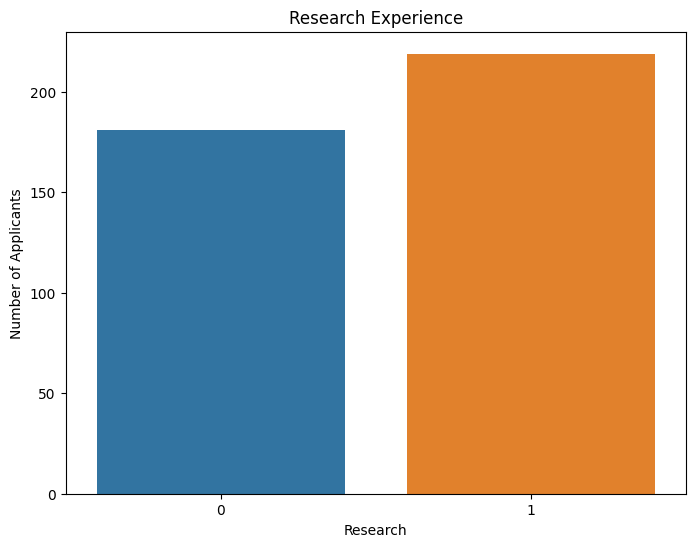

In [18]:
fig= plt.subplots(figsize=(8,6))
sns.countplot(x="Research",data=df)
plt.title('Research Experience')
plt.ylabel('Number of Applicants')


<Axes: >

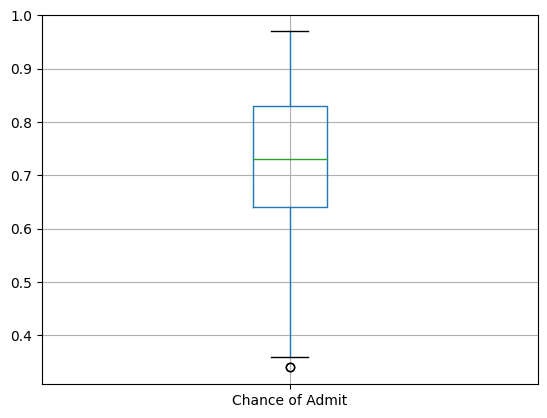

In [19]:
df.boxplot(column=['Chance of Admit'])


Observations:
- Chance of admit have the outlier values because the circle value is lower than the min

<Axes: >

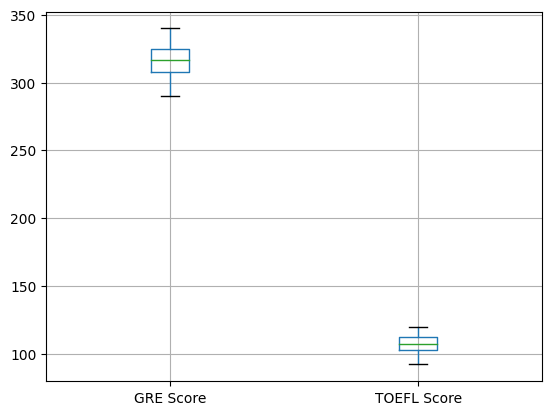

In [20]:
df.boxplot(column=['GRE Score','TOEFL Score'])


<Axes: >

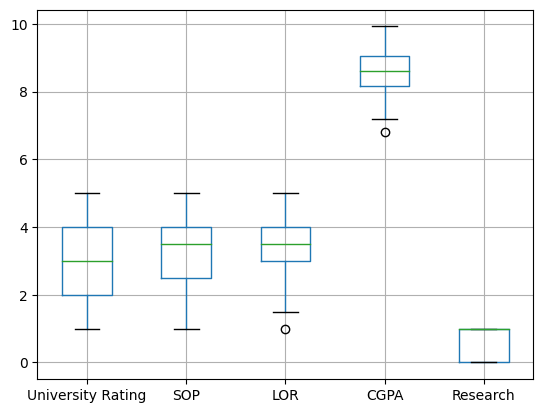

In [21]:
df.boxplot(column=['University Rating','SOP','LOR','CGPA','Research'])


Observation: 
- LOR and CGPA have outliers

#Removing Outliers using IQR method

In [22]:
#Calculating Quartiles of each features
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR =Q3 - Q1
print(IQR)


GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [23]:
outlier = df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
outlier.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


Remove Outliers

In [24]:
df.shape

(400, 8)

In [25]:
not_outlier = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df= not_outlier.copy()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          396 non-null    int64  
 1   TOEFL Score        396 non-null    int64  
 2   University Rating  396 non-null    int64  
 3   SOP                396 non-null    float64
 4   LOR                396 non-null    float64
 5   CGPA               396 non-null    float64
 6   Research           396 non-null    int64  
 7   Chance of Admit    396 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.8 KB


<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

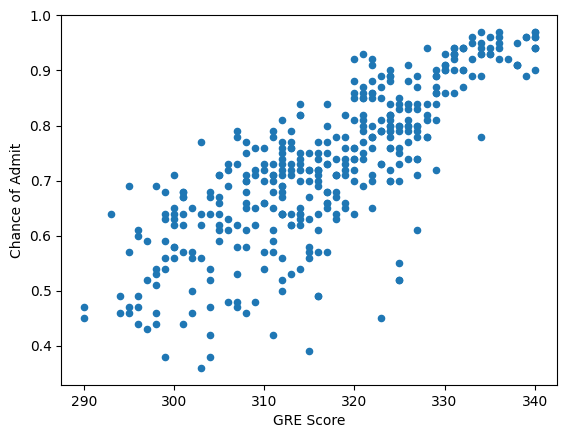

In [27]:
df.plot.scatter('GRE Score',"Chance of Admit")


<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

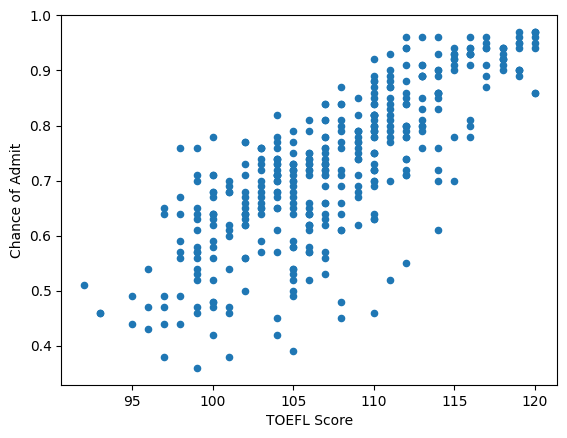

In [28]:
df.plot.scatter('TOEFL Score',"Chance of Admit")



<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

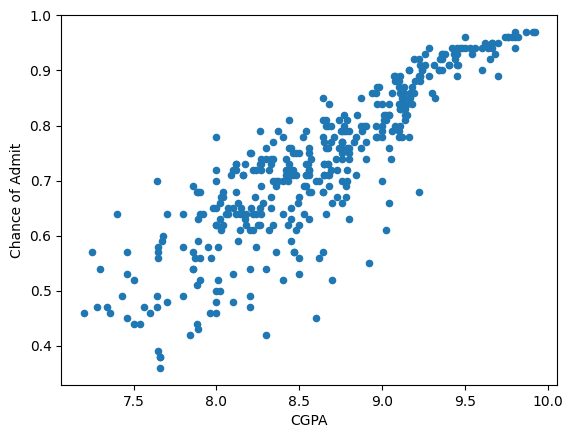

In [29]:
df.plot.scatter('CGPA',"Chance of Admit")



Observation : 
- Higher GRE Score, TOEFL Score, CGPA have higher chances of getting an admit.

<Axes: >

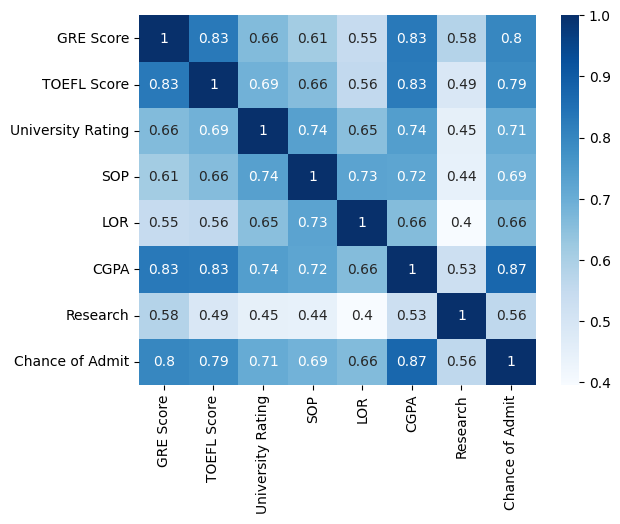

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Observations:
- Students who have High GRE Score tend to also have high TOEFL Score and CGPA. That means they are positively correlated
- CGPA and Chance of Admit is also highly correlated which suggests that CGPA is a very important factor

Create Training and Testing Split

In [31]:
#seperating independent and dependent variables
# X = df.iloc[:,:-1]
# Y = df.iloc[:,7]
X =df.drop(['Chance of Admit'],axis=1)
Y = df['Chance of Admit']
X.shape,Y.shape

((396, 7), (396,))

In [32]:
#import train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=56)

Model Selection and Training

1. Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [34]:
linreg = LinearRegression()
#input to model is train_x and output is train_y
linreg.fit(train_x, train_y)


LinearRegression()

Prediction from model

In [35]:
#Predict over train and test set
train_predict = linreg.predict(train_x)
k = mae(train_predict,train_y)
print('Test MAE for training data',k)

Test MAE for training data 0.04232224824832756


Observation :
- MAE function give error between actual output and predicted output
- 0.04 -> predicting output accurately

In [36]:
test_predict = linreg.predict(test_x)
k = mae(test_predict,test_y)
print("Test MAE for testing data",k)

Test MAE for testing data 0.04759567870445306


In [37]:
predictions = pd.DataFrame(test_predict,test_y).reset_index()
predictions.columns = ['Predictions','Actual']
predictions.head()

,Predictions,Actual
0,0.47,0.526520
1,0.76,0.715711
2,0.76,0.703535
3,0.63,0.571284
4,0.74,0.767416


In [38]:
train_y.unique()

array([0.57, 0.83, 0.96, 0.84, 0.79, 0.65, 0.49, 0.68, 0.59, 0.64, 0.71,
       0.72, 0.73, 0.97, 0.86, 0.63, 0.46, 0.7 , 0.58, 0.9 , 0.67, 0.69,
       0.54, 0.92, 0.94, 0.76, 0.89, 0.93, 0.53, 0.56, 0.82, 0.91, 0.8 ,
       0.66, 0.74, 0.87, 0.62, 0.77, 0.78, 0.47, 0.52, 0.75, 0.81, 0.45,
       0.55, 0.61, 0.95, 0.88, 0.44, 0.48, 0.43, 0.85, 0.6 , 0.42, 0.39,
       0.38])

In [39]:
#Check Accuracy
linreg_score = linreg.score(test_x,test_y) * 100
linreg_score


77.60029591127446

2. Decision Tree
- greater than 65%: 1 = admission likely
- less than 65%: 0 = admission unlikely
The remainer columns will be used as predictors.

In [40]:
X = df.iloc[:,:-1]
Y = df['Chance of Admit'] >= 0.65

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 1, test_size=0.2)

dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.01, criterion='gini')
dt.fit(x_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.01, max_depth=2)

In [41]:
Y.unique()

array([ True, False])

[Text(0.5, 0.8333333333333334, 'CGPA <= 8.255\ngini = 0.402\nsamples = 316\nvalue = [88, 228]\nclass = likely admit'),
 Text(0.25, 0.5, 'CGPA <= 7.83\n0.401\n90\n[65, 25]\nunlikely admit'),
 Text(0.125, 0.16666666666666666, '0.0\n23\n[23, 0]\nunlikely admit'),
 Text(0.375, 0.16666666666666666, '0.468\n67\n[42, 25]\nunlikely admit'),
 Text(0.75, 0.5, 'GRE Score <= 301.5\n0.183\n226\n[23, 203]\nlikely admit'),
 Text(0.625, 0.16666666666666666, '0.245\n7\n[6, 1]\nunlikely admit'),
 Text(0.875, 0.16666666666666666, '0.143\n219\n[17, 202]\nlikely admit')]

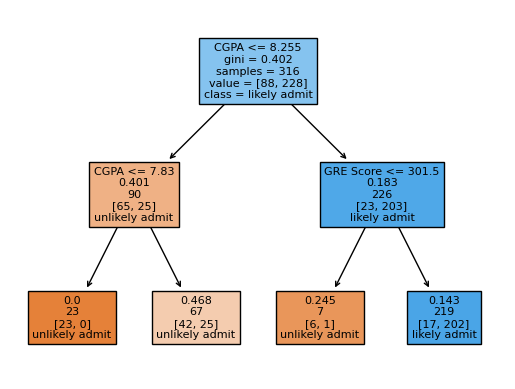

In [42]:
# visualize tree
from sklearn import tree
tree.plot_tree(dt,
               feature_names = train_x.columns,
               max_depth = 2,
               class_names = ['unlikely admit', 'likely admit'],
               label = 'root',
               filled = True)



In [43]:
y_pred = dt.predict(x_test)
dec_tree_score=accuracy_score(y_test, y_pred)*100

print('Accuracy score: ' +str(dec_tree_score))

Accuracy score: 83.75


3. Random Forests 

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(train_x, train_y)
y_predict = forest.predict(test_x)
forest_score = (forest.score(test_x, test_y))*100
forest_score

78.90510037237351

Comparing Scores

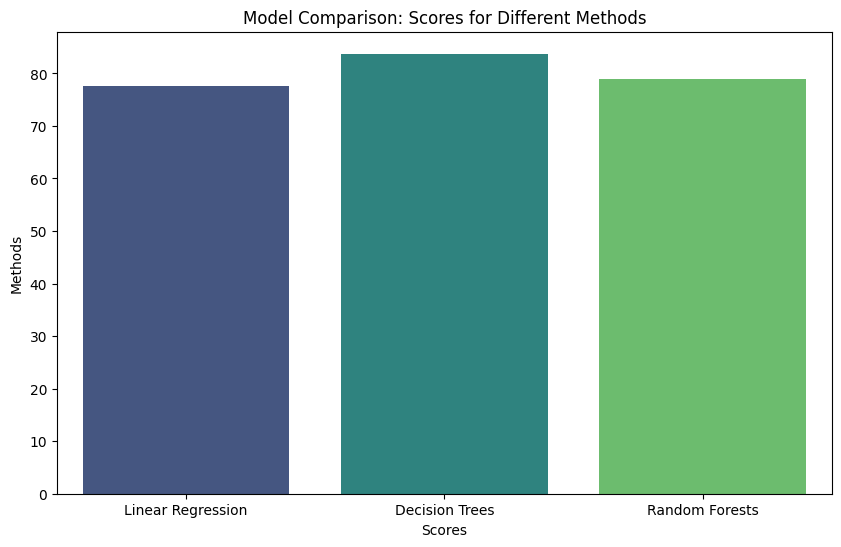

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the methods and scores
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = [linreg_score, dec_tree_score, forest_score]

# Create a bar plot with methods on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(y=Scores, x=Methods, palette='viridis')

# Add labels and a title
plt.xlabel('Scores')
plt.ylabel('Methods')
plt.title('Model Comparison: Scores for Different Methods')

# Display the plot
plt.show()